**Step 1: Import Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


**Step 2: Prepare the Dataset**

In [ ]:
# XOR dataset

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Y  = np.array([[0], [1], [1], [0]])

**Step 3: Define Hyperparameters**

In [ ]:
# Hyperparameters

input_size = 2

hidden_size = 2

output_size = 1

learning_rate = 0.1

epochs = 10000

**Step 4: Initialize Weights and Biases**

In [ ]:
# Initialize weights and biases

np.random.seed(42) # For reproducibility

weights1 = np.random.randn(input_size, hidden_size)

bias1 = np.random.randn(1, hidden_size)

weights2 = np.random.randn(hidden_size, output_size)

bias2 = np.random.randn(1, output_size)

**Step 5: Define Activation Function**

In [ ]:
# Sigmoid activation and its derivative

def Sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def Sigmoid_derivative(a):
    return a * (1 - a)

**Step 6: Forward Propagation**
This computes the output from inputs through the network.
● Hidden layer input: z1 = X * weights1 + bias1

● Hidden layer output: a1 = sigmoid(z1)

● Output layer input: z2 = a1 * weights2 + bias2

● Output: a2 = sigmoid(z2)


**Step 7: Back Propagation**
This calculates gradients to update weights/biases.

● Error at output: delta2 = (a2 - y) * sigmoid_derivative(a2)

● Gradients for weights2/bias2: d_weights2 = a1.T * delta2, d_bias2 = sum(delta2)

● Error at hidden: delta1 = delta2 * weights2.T * sigmoid_derivative(a1)

● Gradients for weights1/bias1: d_weights1 = X.T * delta1, d_bias1 = sum(delta1)

Then update: weights -= learning_rate * gradients


**Step 8: Training Loop**

In [ ]:
# Track loss for plotting

losses = []

for epoch in range(epochs):

  # Forward propagation

  z1 = np.dot(X, weights1) + bias1

  a1 = Sigmoid(z1)

  z2 = np.dot(a1, weights2) + bias2

  a2 = Sigmoid(z2)

  # Compute loss(MSE)

  loss = np.mean((a2 - Y)**2)

  losses.append(loss)

  # Backpropagation

  delta2 = (a2 - Y) * Sigmoid_derivative(a2)

  d_weights2 = np.dot(a1.T, delta2)

  d_bias2 = np.sum(delta2, axis=0, keepdims=True)

  delta1 = np.dot(delta2, weights2.T) * Sigmoid_derivative(a1)

  d_weights1 = np.dot(X.T, delta1)

  d_bias1 = np.sum(delta1, axis=0, keepdims=True)

  # Update weights and biases

  weights2 -= learning_rate * d_weights2

  bias2 -= learning_rate * d_bias2

  weights1 -= learning_rate * d_weights1

  bias1 -= learning_rate * d_bias1

  # Print progress every 1000 epochs

  if epoch % 1000 == 0:

    print(f"Epoch {epoch}, Loss: {loss}")



Epoch 0, Loss: 0.2943508288500037
Epoch 1000, Loss: 0.24440977094692865
Epoch 2000, Loss: 0.2035390981781202
Epoch 3000, Loss: 0.1533485406663887
Epoch 4000, Loss: 0.04633103600452315
Epoch 5000, Loss: 0.015614674284243894
Epoch 6000, Loss: 0.008448376076782192
Epoch 7000, Loss: 0.00561351355775748
Epoch 8000, Loss: 0.004146485528192299
Epoch 9000, Loss: 0.0032635336784319594


**Step 9: Plot the Training Loss**

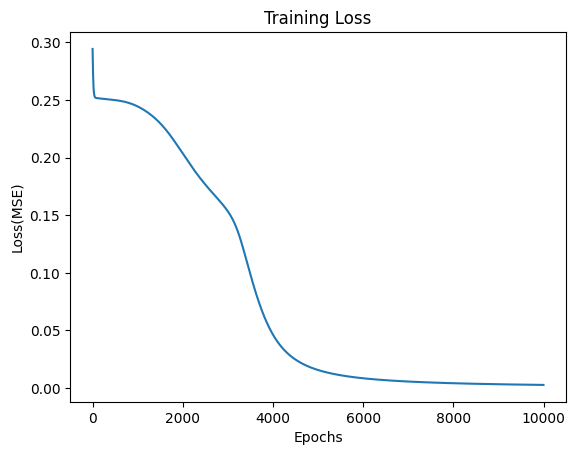

In [ ]:
# Plot loss curve

plt.plot(losses)

plt.title("Training Loss")

plt.xlabel("Epochs")

plt.ylabel('Loss(MSE)')

plt.show()

**Step 9: Test the Model**

In [ ]:
# Forward pass on training data

z1 = np.dot(X, weights1) + bias1

a1 = Sigmoid(z1)

z2 = np.dot(a1, weights2) + bias2

a2 = Sigmoid(z2)

# Round to 0 or 1 for clarity

predictions = np.round(a2)

# Print predictions

print("Predictions:")

print(predictions)

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]
